# Classificadores
---
* Modelos que visam descrever ou prever um atributo especial chamdo classe.
* Descobrir ou descrver a classe de um fato
* É usado para preve uma fraude, descobrir a ual espécie um animal pertence, prever uma doença ou classificar um tipo de fungo.
* Geralmente a classe (aquilo que se quer prever) esta localizado como último atributo
## Tipos de Algorítimos:
* Árvores de decisão 
* Redes neurais artificiais e aprendizado profundo
* Máquina de Vetor de Suporte: cria vetores para classificar os dados.
* Método de Grupos
    * Florestas Aleatórias 
    * Boosting
* Aprendizado Baseado em Instâncias: classificador do vizinho mais próximo.
    * Nearest-neighbor
* Bayes: baseado ma teoria das probabilidades e que supóem que os atributos vão influenciar a classe de forma independente.
    * NaiveBayes: considera as probabilidades de forma independente
    * BayesNet
* Rules: estruturas do tipo if. 
    * OneR
    * Part

## Matriz de Confusão:
* Cruza os erros e aceros do modelo para identificar os Verdadeiros/Falsos Positivos e Verdadeiros/Falsos Negativos

## Generalização, Super Ajuste e Sub Ajuste
* O objetivo de todo classificador é criar modelos genéricos 
* O modelo super ajustado funciona bem com dados de treino, mas tem desempenho baixo diante dos dados de teste ou em produção
* O modelo sub ajustado não consegue boas taxas de previsão e não é capaz de capturar as características do negócio para o modelo.

## Causas de Super e Sub Ajuste
    * Dados não representativos
    * Dados não significativos(poucos)
    * Forma de treinamento
    * Classe rara
        * Transações de Fraude: a fraude é uma classe rara
        * O modelo pode ter dificuldade de aprender uma classe rara
        * Solução: estratidicação
    * Modelo incorreto

<img src="img/ajuste.PNG">

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

# Data

In [5]:
df = pd.read_csv('datasets/Credit.csv')
df.shape

(1000, 21)

In [6]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


# Formato de matriz
---
* separando previsores (variáveis explicativas) da classe preditora (variável de interesse)

In [14]:
predict = df.iloc[:,0:20].values
class_ = df.iloc[:,20].values

In [17]:
# Transformação dos atributos categóricos em numéricos, passando o índice de cada coluna categórica
## Apenas os atrigutos categóricos, os numéricos permanecem
label_1 = LabelEncoder()
predict[:,0] = label_1.fit_transform(predict[:,0])

label_2 = LabelEncoder()
predict[:,2] = label_2.fit_transform(predict[:,2])
label_3 = LabelEncoder()
predict[:,3] = label_3.fit_transform(predict[:,3])

label_4 = LabelEncoder()
predict[:,5] = label_4.fit_transform(predict[:,5])
label_5 = LabelEncoder()
predict[:,6] = label_5.fit_transform(predict[:,6])

label_6 = LabelEncoder()
predict[:,8] = label_6.fit_transform(predict[:,8])
label_7 = LabelEncoder()
predict[:,9] = label_7.fit_transform(predict[:,9])

label_8 = LabelEncoder()
predict[:,11] = label_8.fit_transform(predict[:,11])

label_9 = LabelEncoder()
predict[:,13] = label_9.fit_transform(predict[:,13])
label_10 = LabelEncoder()
predict[:,14] = label_10.fit_transform(predict[:,14])

label_11 = LabelEncoder()
predict[:,16] = label_11.fit_transform(predict[:,16])

label_12 = LabelEncoder()
predict[:,18] = label_12.fit_transform(predict[:,18])
label_13 = LabelEncoder()
predict[:,19] = label_13.fit_transform(predict[:,19])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(predict, 
                                                    class_,
                                                    test_size=0.3,
                                                   random_state = 0)
X_test

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [20]:
# Criação e treinamento do modelo (geração de uma tabela de probabilidade)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [22]:
# Previsões utilizando os registros de teste
prev = naive_bayes.predict(X_test)

In [23]:
prev

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [24]:
# Geração da matriz de confusão (compara os dados reais dos previstos) e cálculo da taxa de acertos e erro
# 41 e 172 acertos, 42 e 45 erros
conf = confusion_matrix(Y_test, prev)
conf

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [25]:
tx_acerto = accuracy_score(Y_test, prev)
tx_erro = 1 - tx_acerto
tx_acerto

0.71

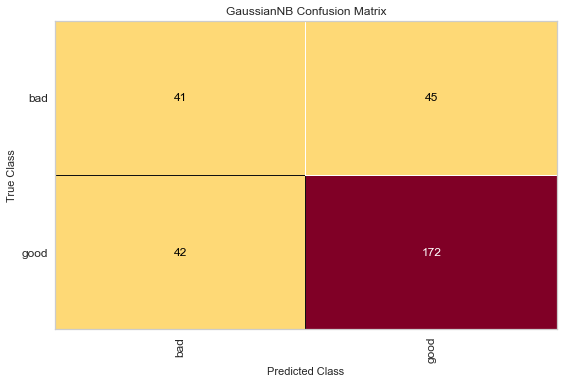

In [27]:
# Visualização da matriz de consusão 
v = ConfusionMatrix(GaussianNB())
v.fit(X_train, Y_train)
v.score(X_test, Y_test)
v.poof();

# Produção do modelo 
---

In [29]:
df_new = pd.read_csv('datasets/NovoCredit.csv')
df_new.shape

(1, 20)

In [30]:
df_new.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [31]:
# Usa-se o mesmo objeto que já foi criado anteriormente 
## Chama-se apenas o método "transform", porque a adaptação aos dados (fit) já foi feita
df_new = df_new.iloc[:,0:20].values

df_new[:,0] = label_1.transform(df_new[:,0])

df_new[:,2] = label_2.transform(df_new[:,2])

df_new[:,3] = label_3.transform(df_new[:,3])

df_new[:,5] = label_4.transform(df_new[:,5])

df_new[:,6] = label_5.transform(df_new[:,6])

df_new[:,8] = label_6.transform(df_new[:,8])

df_new[:,9] = label_7.transform(df_new[:,9])

df_new[:,11] = label_8.transform(df_new[:,11])

df_new[:,13] = label_9.transform(df_new[:,13])

df_new[:,14] = label_10.transform(df_new[:,14])

df_new[:,16] = label_11.transform(df_new[:,16])

df_new[:,18] = label_12.transform(df_new[:,18])

df_new[:,19] = label_13.transform(df_new[:,19])

In [32]:
# Resultado da nova previsão
naive_bayes.predict(df_new)

array(['good'], dtype='<U4')